In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from constants import guest_types
from constants import colors
from constants import systems
from bootstrap import bootstrap
from bootstrap import dG_bootstrap
from bootstrap import dH_bootstrap
import plotting

# Load in results

In [3]:
bgbg = pd.read_csv("results/bgbg_tip3p_by_orientation.csv")
bgbg_combined = pd.read_csv("results/bgbg_tip3p_combined.csv")

bg2bg2 = pd.read_csv("results/bg2bg2_tip3p_by_orientation.csv")
bg2bg2_combined = pd.read_csv("results/bg2bg2_tip3p_combined.csv")

smirnoff = pd.read_csv("results/smirnoff_by_orientation.csv")
smirnoff_combined = pd.read_csv("results/smirnoff_combined.csv")

experimental = pd.read_csv("results/experimental.csv")

In [4]:
bgbg["-TdS"] = bgbg["Delta G"] - bgbg["Delta H"]
bgbg["-TdS_SEM"] = np.sqrt(bgbg["G_SEM"] ** 2 + bgbg["H_SEM"] ** 2)

bg2bg2["-TdS"] = bg2bg2["Delta G"] - bg2bg2["Delta H"]
bg2bg2["-TdS_SEM"] = np.sqrt(bg2bg2["G_SEM"] ** 2 + bg2bg2["H_SEM"] ** 2)

smirnoff["-TdS"] = smirnoff["Delta G"] - smirnoff["Delta H"]
smirnoff["-TdS_SEM"] = np.sqrt(smirnoff["G_SEM"] ** 2 + smirnoff["H_SEM"] ** 2)


smirnoff_combined["-TdS"] = smirnoff_combined["Delta G"] - smirnoff_combined["Delta H"]
smirnoff_combined["-TdS_SEM"] = np.sqrt(
    smirnoff_combined["G_SEM"] ** 2 + smirnoff_combined["H_SEM"] ** 2
)

bgbg_combined["-TdS"] = bgbg_combined["Delta G"] - bgbg_combined["Delta H"]
bgbg_combined["-TdS_SEM"] = np.sqrt(
    bgbg_combined["G_SEM"] ** 2 + bgbg_combined["H_SEM"] ** 2
)

bg2bg2_combined["-TdS"] = bg2bg2_combined["Delta G"] - bg2bg2_combined["Delta H"]
bg2bg2_combined["-TdS_SEM"] = np.sqrt(
    bg2bg2_combined["G_SEM"] ** 2 + bg2bg2_combined["H_SEM"] ** 2
)

experimental["-TdS"] = experimental["Delta G"] - experimental["Delta H"]
experimental["-TdS_SEM"] = np.sqrt(
    experimental["G_SEM"] ** 2 + experimental["H_SEM"] ** 2
)


# Plot comparisons

In [5]:
def scatter(df, x, y, xerr, yerr, xlabel, ylabel, colors, name, statistics_file_prefix):
    fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

    for index, typ in enumerate(df["Type"].unique()):
        tmp = df[df["Type"] == typ]        
        ax.errorbar(
            tmp[x],
            tmp[y],
            xerr=tmp[xerr],
            yerr=tmp[yerr],
            fmt="o",
            markersize=8,
            markeredgecolor="k",
            markeredgewidth=0.2,
            elinewidth=1.0,
            ecolor="0.5",
            color=colors[typ],
        )

        type_statistics = pd.read_csv(f"results/{statistics_file_prefix}_{typ}.csv")
        type_statistics.index = type_statistics["Unnamed: 0"]
        type_string = f"R$^2$ = {type_statistics['mean']['R**2']:0.2f}"
        artist = ax.annotate(
            type_string,
            (0.98, 0.02 + 0.05 * index),
            xytext=(4, -4),
            xycoords="axes fraction",
            textcoords="offset points",
            horizontalalignment="right",
            verticalalignment="bottom",
            size=14,
            color=colors[typ],
            transform=ax.transAxes,
        )

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.plot([-50, 50], [-50, 50], ls="-", c="0.3", zorder=-1, lw="0.5")
    ax.set_ylim(-8, 6)
    ax.set_xlim(-8, 6)

    statistics = pd.read_csv(f"results/{statistics_file_prefix}_overall.csv")
    statistics.index = statistics["Unnamed: 0"]
    
    ci_string = statistics['ci']['RMSE']
    ci_low, ci_high = [float(number) for number in re.findall(r"(\d+(?:\.\d+)?)", ci_string)]
    text = f"RMSE = {statistics['mean']['RMSE']:0.2f} [{ci_low:0.2f}, {ci_high:0.2f}]"
    text += "\n"
    ci_string = statistics['ci']['R**2']
    ci_low, ci_high = [float(number) for number in re.findall(r"(\d+(?:\.\d+)?)", ci_string)]
    text += f"R$^2$ = {statistics['mean']['R**2']:0.2f} [{ci_low:0.2f}, {ci_high:0.2f}]"
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height
    ax.annotate(
        text,
        (0.01, 0.99),
        xytext=(4, -4),
        xycoords="axes fraction",
        textcoords="offset points",
        horizontalalignment="left",
        verticalalignment="top",
        size=14,
        backgroundcolor="white",
        transform=ax.transAxes,
    )
    fig.savefig(f"figures/{name}.pdf", bbox_inches="tight")
    fig.savefig(f"figures/{name}.svg", bbox_inches="tight")    

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (83) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (40) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (107) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (93) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (53) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))


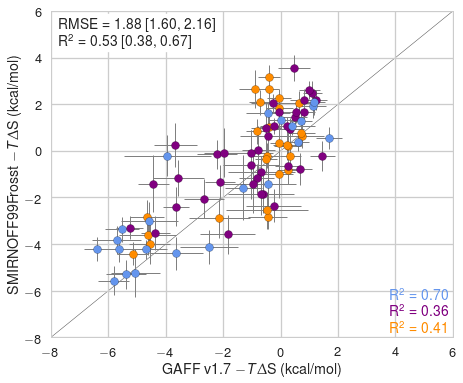

In [6]:
# SMIRNOFF99Frosst vs. GAFF v1.7

df = smirnoff.merge(bgbg, on=["System", "Type"], suffixes=("_smirnoff",
                                                                "_bgbg_tip3p"))
assert(len(df) == 86)

artist = scatter(df, 
        x="-TdS_bgbg_tip3p",
        y="-TdS_smirnoff",
        xerr="-TdS_SEM_bgbg_tip3p",
        yerr="-TdS_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $-T\Delta$S (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-TdS-by-orientation",
        statistics_file_prefix="bgbg_smirnoff_by_orientation_-TdS_statistics")

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (107) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (97) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (93) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))


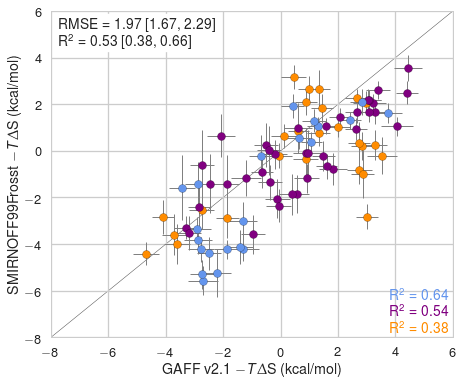

In [7]:
# SMIRNOFF99Frosst vs. GAFF v2.1

df = smirnoff.merge(bg2bg2, on=["System", "Type"], suffixes=("_smirnoff",
                                                                "_bg2bg2_tip3p"))
assert(len(df) == 86)

scatter(df, 
        x="-TdS_bg2bg2_tip3p",
        y="-TdS_smirnoff",
        xerr="-TdS_SEM_bg2bg2_tip3p",
        yerr="-TdS_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $-T\Delta$S (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-TdS-by-orientation",
        statistics_file_prefix="bg2bg2_smirnoff_by_orientation_-TdS_statistics")

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (53) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (77) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (69) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (111) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (108) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (41) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/m

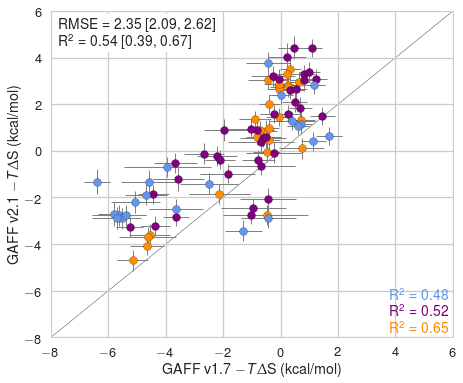

In [8]:
# GAFF v1.7 vs. GAFF v2.1

df = bgbg.merge(bg2bg2, on=["System", "Type"], suffixes=("_bgbg_tip3p",
                                                                "_bg2bg2_tip3p"))
assert(len(df) == 86)

scatter(df, 
        x="-TdS_bgbg_tip3p",
        y="-TdS_bg2bg2_tip3p",
        xerr="-TdS_SEM_bgbg_tip3p",
        yerr="-TdS_SEM_bg2bg2_tip3p",
        xlabel=r"GAFF v1.7 $-T\Delta$S (kcal/mol)",
        ylabel=r"GAFF v2.1 $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="GAFF-v2.1-vs-GAFF-v1.7-TdS-by-orientation",
        statistics_file_prefix="bgbg_bg2bg2_by_orientation_-TdS_statistics")

## Combined results with pre-computed statistics

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (77) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (73) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (82) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (105) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (109) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (101) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (115) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (115) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (61) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/m

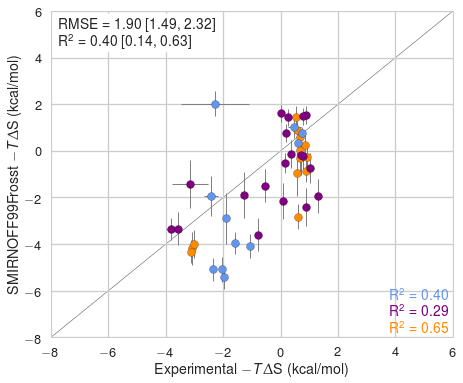

In [9]:
# SMIRNOFF99Frosst vs. Experiment

df = smirnoff_combined.merge(experimental, on=["System"], suffixes=("_smirnoff",
                                                                "_experiment"))
assert(len(df) == 43)

scatter(df, 
        x="-TdS_experiment",
        y="-TdS_smirnoff",
        xerr="-TdS_SEM_experiment",
        yerr="-TdS_SEM_smirnoff",
        xlabel=r"Experimental $-T\Delta$S (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="SMIRNOFF99Frosst-vs-Experiment-TdS",
        statistics_file_prefix="experimental_smirnoff_-TdS_statistics")

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (41) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (71) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (65) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (116) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (97) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (108) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/m

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (91) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (44) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (93) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))


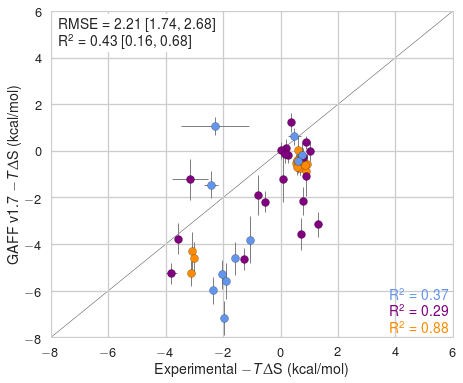

In [10]:
# GAFF v1.7 vs. Experiment

df = bgbg_combined.merge(experimental, on=["System"], suffixes=("_bgbg",
                                                                "_experiment"))
assert(len(df) == 43)

scatter(df, 
        x="-TdS_experiment",
        y="-TdS_bgbg",
        xerr="-TdS_SEM_experiment",
        yerr="-TdS_SEM_bgbg",
        xlabel=r"Experimental $-T\Delta$S (kcal/mol)",
        ylabel=r"GAFF v1.7 $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="GAFF-v1.7-vs-Experiment-TdS",
        statistics_file_prefix="experimental_bgbg_-TdS_statistics")

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (108) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (41) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (71) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (105) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (109) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (82) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (61) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

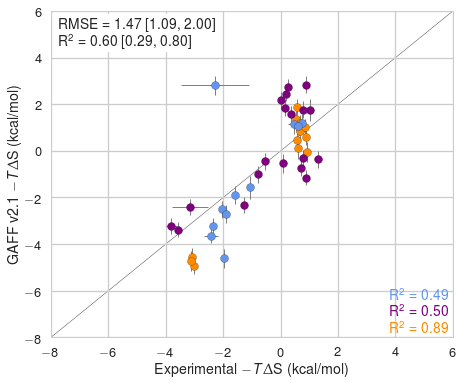

In [11]:
# GAFF v2.1 vs. Experiment

df = bg2bg2_combined.merge(experimental, on=["System"], suffixes=("_bg2bg2",
                                                                "_experiment"))
assert(len(df) == 43)

scatter(df, 
        x="-TdS_experiment",
        y="-TdS_bg2bg2",
        xerr="-TdS_SEM_experiment",
        yerr="-TdS_SEM_bg2bg2",
        xlabel=r"Experimental $-T\Delta$S (kcal/mol)",
        ylabel=r"GAFF v2.1 $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="GAFF-v2.1-vs-Experiment-TdS",
        statistics_file_prefix="experimental_bg2bg2_-TdS_statistics")

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (51) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (77) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (69) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (111) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (108) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (41) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/m

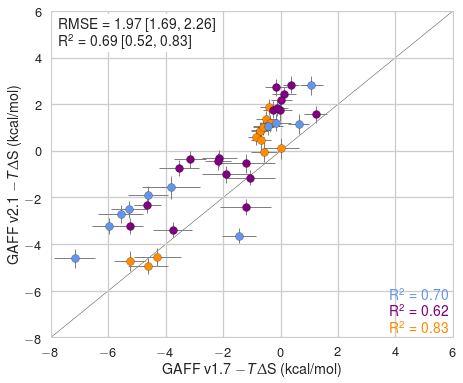

In [12]:
# GAFF v1.7 vs. GAFF v2.1

df = bg2bg2_combined.merge(bgbg_combined, on=["System", "Type"], suffixes=("_bg2bg2",
                                                                "_bgbg"))
assert(len(df) == 43)

scatter(df, 
        x="-TdS_bgbg",
        y="-TdS_bg2bg2",
        xerr="-TdS_SEM_bgbg",
        yerr="-TdS_SEM_bg2bg2",
        xlabel=r"GAFF v1.7 $-T\Delta$S (kcal/mol)",
        ylabel=r"GAFF v2.1 $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="GAFF-v2.1-vs-GAFF-v1.7-TdS",
        statistics_file_prefix="bgbg_bg2bg2_-TdS_statistics")

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (83) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (40) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (107) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (44) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (93) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))


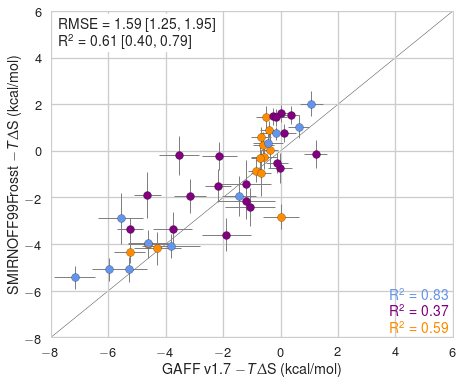

In [13]:
# SMIRNOFF99Frosst vs. GAFF v1.7

df = smirnoff_combined.merge(bgbg_combined, on=["System", "Type"], suffixes=("_smirnoff",
                                                                "_bgbg"))
assert(len(df) == 43)

scatter(df, 
        x="-TdS_bgbg",
        y="-TdS_smirnoff",
        xerr="-TdS_SEM_bgbg",
        yerr="-TdS_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $-T\Delta$S (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-TdS",
        statistics_file_prefix="bgbg_smirnoff_-TdS_statistics")

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (56) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (54) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (57) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (46) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (84) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvro8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ma

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (51) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (69) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (53) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/mat

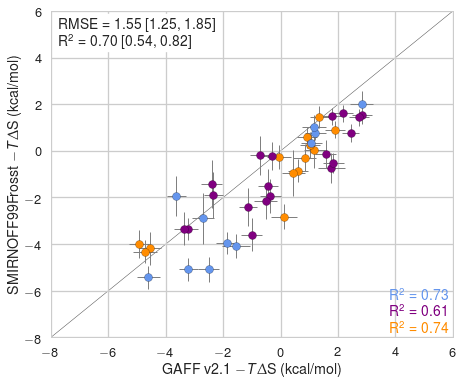

In [14]:
# SMIRNOFF99Frosst vs. GAFF v2.1

df = smirnoff_combined.merge(bg2bg2_combined, on=["System", "Type"], suffixes=("_smirnoff",
                                                                "_bg2bg2"))
assert(len(df) == 43)

scatter(df, 
        x="-TdS_bg2bg2",
        y="-TdS_smirnoff",
        xerr="-TdS_SEM_bg2bg2",
        yerr="-TdS_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $-T\Delta$S (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $-T\Delta$S (kcal/mol)",
        colors=colors,
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-TdS",
        statistics_file_prefix="bg2bg2_smirnoff_-TdS_statistics")